# NLP Data Acquisition (Web Scraping)

## Exercises

### 1. Codeup Blog Articles

https://codeup.com/blog/

Visit Codeup's Blog and record the urls for at least 5 distinct blog posts. For each post, you should scrape at least the post's title and content.

Encapsulate your work in a function named get_blog_articles that will return a list of dictionaries, with each dictionary representing one article. The shape of each dictionary should look like this:

```python
{
    'title': 'the title of the article',
    'content': 'the full text content of the article'
}
```

Plus any additional properties you think might be helpful.

Bonus: Scrape the text of all the articles linked on codeup's blog page.

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from pprint import pprint
from requests import get
import requests
import random
import os

In [2]:
url = 'https://codeup.edu/blog/'

In [3]:
user_agents = [
  "Mozilla/5.0 (Windows NT 10.0; rv:91.0) Gecko/20100101 Firefox/91.0",
  "Mozilla/5.0 (Windows NT 10.0; rv:78.0) Gecko/20100101 Firefox/78.0",
  "Mozilla/5.0 (X11; Linux x86_64; rv:95.0) Gecko/20100101 Firefox/95.0"
  ]

# Select random user_agent

user_agents = random.choice(user_agents)

In [4]:
headers = {"User-Agent": user_agents[0]}
response = requests.get(url, headers=headers)
response

<Response [200]>

In [5]:
def random_header():
    """
    The function returns a randomly selected user agent header for web scraping purposes.
    :return: a dictionary with a single key-value pair, where the key is 'User-Agent' and the value is a
    randomly chosen user agent string from a list of user agents.
    """
    user_agents = [
        "Mozilla/5.0 (Windows NT 10.0; rv:91.0) Gecko/20100101 Firefox/91.0",
        "Mozilla/5.0 (Windows NT 10.0; rv:78.0) Gecko/20100101 Firefox/78.0",
        "Mozilla/5.0 (X11; Linux x86_64; rv:95.0) Gecko/20100101 Firefox/95.0",
        "Chrome/91.0.4472.124",
        "Mozilla/4.5 (compatible; HTTrack 3.0x; Windows 98)"
    ]
    random_user_agent = random.choice(user_agents)
    return {'User-Agent': f'{random_user_agent}'}

In [6]:
soup = BeautifulSoup(response.text, 'html.parser')
soup

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="https://codeup.edu/xmlrpc.php" rel="pingback"/>
<script type="text/javascript">
		document.documentElement.className = 'js';
	</script>
<link crossorigin="" href="https://fonts.gstatic.com" rel="preconnect"/><script id="diviarea-loader">window.DiviPopupData=window.DiviAreaConfig={"zIndex":1000000,"animateSpeed":400,"triggerClassPrefix":"show-popup-","idAttrib":"data-popup","modalIndicatorClass":"is-modal","blockingIndicatorClass":"is-blocking","defaultShowCloseButton":true,"withCloseClass":"with-close","noCloseClass":"no-close","triggerCloseClass":"close","singletonClass":"single","darkModeClass":"dark","noShadowClass":"no-shadow","altCloseClass":"close-alt","popupSelector":".et_pb_section.popup","initializeOnEvent":"et_pb_after_init_modules","popupWrapperClass":"area-outer-wrap","fullHeightClass":"full-height","openPopupClass":"da-overlay-visible","ove

In [7]:
# H2 is the blog posts, select the title of the blog post, and the content of the link

blog_posts = soup.select('h2 a')
blog_posts

# Create a list of dictionaries with the title and content of the blog post

blog_posts_list = []

for post in blog_posts:
    blog_posts_list.append({
        'title': post.text,
        'content': post.get('href')
    })
    
blog_posts_list

[{'title': 'Spotlight on APIDA Voices: Celebrating Heritage and Inspiring Change ft. Arbeena Thapa',
  'content': 'https://codeup.edu/featured/apida-heritage-month/'},
 {'title': 'Women in tech: Panelist Spotlight – Magdalena Rahn',
  'content': 'https://codeup.edu/featured/women-in-tech-panelist-spotlight/'},
 {'title': 'Women in tech: Panelist Spotlight – Rachel Robbins-Mayhill',
  'content': 'https://codeup.edu/featured/women-in-tech-rachel-robbins-mayhill/'},
 {'title': 'Women in Tech: Panelist Spotlight – Sarah Mellor',
  'content': 'https://codeup.edu/codeup-news/women-in-tech-panelist-spotlight-sarah-mellor/'},
 {'title': 'Women in Tech: Panelist Spotlight – Madeleine Capper',
  'content': 'https://codeup.edu/events/women-in-tech-madeleine/'},
 {'title': 'Black Excellence in Tech: Panelist Spotlight – Wilmarie De La Cruz Mejia',
  'content': 'https://codeup.edu/codeup-news/panelist-spotlight-4/'}]

In [8]:
# from p in soup, get the text
for post in blog_posts:
    response = requests.get(str(post['href']), headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    paragraphs = soup.select('p')
    blog_posts_list.append({
        'title': post.text,
        'content': paragraphs[0].text if paragraphs else ''
    })

paragraphs = soup.select('p')
paragraphs

[<p class="post-meta"><span class="published">Feb 16, 2023</span> | <a href="https://codeup.edu/category/codeup-news/" rel="category tag">Codeup News</a>, <a href="https://codeup.edu/category/events/" rel="category tag">Events</a>, <a href="https://codeup.edu/category/featured/" rel="category tag">Featured</a></p>,
 <p><img alt="panelist spotlight" class="wp-image-19633 alignleft" decoding="async" height="131" src="https://codeup.edu/wp-content/uploads/2023/02/AC8DABF2-2FDC-4C5A-A9B2-22EBCA4187AD-296x300.jpeg" width="129"/></p>,
 <p><span style="font-weight: 400;">Codeup is hosting a Black Excellence in Tech Panel in honor of Black History Month on February 22, 2023! To further celebrate, we’d like to spotlight each of our panelists leading up to the discussion to learn a bit about their respective experiences as black leaders in the tech industry!  </span></p>,
 <p><strong>Meet Wilmarie!</strong></p>,
 <p><a href="https://www.linkedin.com/in/wilmarie-de-la-cruz-b91338162/"><span style

In [9]:
user_agents = [
  "Mozilla/5.0 (Windows NT 10.0; rv:91.0) Gecko/20100101 Firefox/91.0",
  "Mozilla/5.0 (Windows NT 10.0; rv:78.0) Gecko/20100101 Firefox/78.0",
  "Mozilla/5.0 (X11; Linux x86_64; rv:95.0) Gecko/20100101 Firefox/95.0"
  ]

# Select random user_agent

user_agents = random.choice(user_agents)

In [10]:
headers = {"User-Agent": user_agents[0]}

In [11]:
import requests
from bs4 import BeautifulSoup

base_url = "https://codeup.edu/blog/"
response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.content, 'html.parser')

blogs = []
####

In [12]:
soup.text[:20]

'\n\n\n\n\n\n\n\n\n\nBlog - Cod'

In [13]:
h2_tag = soup.find_all('h2')
h2_tag

[<h2 class="entry-title"><a href="https://codeup.edu/featured/apida-heritage-month/">Spotlight on APIDA Voices: Celebrating Heritage and Inspiring Change ft. Arbeena Thapa</a></h2>,
 <h2 class="entry-title"><a href="https://codeup.edu/featured/women-in-tech-panelist-spotlight/">Women in tech: Panelist Spotlight – Magdalena Rahn</a></h2>,
 <h2 class="entry-title"><a href="https://codeup.edu/featured/women-in-tech-rachel-robbins-mayhill/">Women in tech: Panelist Spotlight – Rachel Robbins-Mayhill</a></h2>,
 <h2 class="entry-title"><a href="https://codeup.edu/codeup-news/women-in-tech-panelist-spotlight-sarah-mellor/">Women in Tech: Panelist Spotlight – Sarah Mellor</a></h2>,
 <h2 class="entry-title"><a href="https://codeup.edu/events/women-in-tech-madeleine/">Women in Tech: Panelist Spotlight – Madeleine Capper</a></h2>,
 <h2 class="entry-title"><a href="https://codeup.edu/codeup-news/panelist-spotlight-4/">Black Excellence in Tech: Panelist Spotlight – Wilmarie De La Cruz Mejia</a></h2>

In [14]:
titles = []
for h2_tag in soup.find_all('h2'):
    title = h2_tag.get_text()

    titles.append(title)


In [15]:
title

'Git Codeupdates'

In [16]:
# from blogs, pull the title

titles = []

for blog in blogs:
    titles.append(blog.text)
    
titles

[]

In [17]:
# Working-ish

links = []

for blog in blogs:
    links.append(blog.a)
    
links

[]

In [18]:
# Make request and parse the soup
blog_page = requests.get('https://codeup.com/blog/', headers=random_header())
blog_soup = BeautifulSoup(blog_page.content, 'html.parser')

In [19]:
print(blog_soup.prettify()[:100])

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http


In [20]:
# Find all the links to blog articles on the page and extract the URLs
blogs_list = [element["href"] for element in blog_soup.select('a.more-link')]

In [21]:
blogs_list

['https://codeup.edu/featured/apida-heritage-month/',
 'https://codeup.edu/featured/women-in-tech-panelist-spotlight/',
 'https://codeup.edu/featured/women-in-tech-rachel-robbins-mayhill/',
 'https://codeup.edu/codeup-news/women-in-tech-panelist-spotlight-sarah-mellor/',
 'https://codeup.edu/events/women-in-tech-madeleine/',
 'https://codeup.edu/codeup-news/panelist-spotlight-4/']

In [22]:
# Create an empty list to store the blog articles
blogs = []

# Loop through each URL in the blogs_list and scrape the article content
for url in blogs_list:
    # Make a request to the blog article page and parse the HTML content using Beautiful Soup
    response = requests.get(url, headers=random_header())
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the div containing the article content and extract the text of all the paragraphs
    content_div = soup.find('div', class_='entry-content')
    content = ''.join(p.text for p in content_div.find_all('p'))

    # Create a dictionary containing the title and content of the blog article
    blog = {'title': soup.title.text, 'content': content}

    # Append the blog dictionary to the list of blogs
    blogs.append(blog)

In [23]:
for blog in blogs:
    print(blog['title'])

Spotlight on APIDA Voices: Celebrating Heritage and Inspiring Change ft. Arbeena Thapa
Women in tech: Panelist Spotlight – Magdalena Rahn -
Women in tech: Panelist Spotlight - Rachel Robbins-Mayhill
Women in Tech: Panelist Spotlight - Sarah Mellor - Codeup
Women in Tech: Panelist Spotlight - Madeleine Capper - Codeup
Black Excellence in Tech: Panelist Spotlight - Wilmarie De La Cruz Mejia


In [24]:
# Create a pandas DataFrame from the list of blogs
blogs_df = pd.DataFrame(blogs)

In [25]:
blogs_df

,title,content
0,Spotlight on APIDA Voices: Celebrating Heritag...,May is traditionally known as Asian American a...
1,Women in tech: Panelist Spotlight – Magdalena ...,Codeup is hosting a Women in Tech Panel in hon...
2,Women in tech: Panelist Spotlight - Rachel Rob...,Codeup is hosting a Women in Tech Panel in hon...
3,Women in Tech: Panelist Spotlight - Sarah Mell...,Codeup is hosting a Women in Tech Panel in hon...
4,Women in Tech: Panelist Spotlight - Madeleine ...,Codeup is hosting a Women in Tech Panel in hon...
5,Black Excellence in Tech: Panelist Spotlight -...,Codeup is hosting a Black Excellence in Tech P...


### 2. News Articles


We will now be scraping text data from inshorts, a website that provides a brief overview of many different topics.

Write a function that scrapes the news articles for the following topics:

Business
Sports
Technology
Entertainment
The end product of this should be a function named get_news_articles that returns a list of dictionaries, where each dictionary has this shape:
    
{
    'title': 'The article title',
    'content': 'The article content',
    'category': 'business' # for example
}

Hints:

Start by inspecting the website in your browser. Figure out which elements will be useful.
Start by creating a function that handles a single article and produces a dictionary like the one above.
Next create a function that will find all the articles on a single page and call the function you created in the last step for every article on the page.
Now create a function that will use the previous two functions to scrape the articles from all the pages that you need, and do any additional processing that needs to be done.

In [26]:
import requests
from bs4 import BeautifulSoup

In [27]:
# Define the base URL for the news shorts website.
url = 'https://inshorts.com/en/read/'

# Define the default categories to scrape news shorts from
categories = ['business', 'sports', 'technology', 'entertainment']

In [28]:
# Create an empty list to store the news shorts
shorts = []

# Loop through each category
for cat in categories:
    # Make a request to the webpage for the current category and parse the HTML content using Beautiful Soup
    response = requests.get(url + cat)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Loop through each news short on the page and extract the title, content, and category
    for news_card in soup.find_all('div', itemtype = 'http://schema.org/NewsArticle'):
        title = news_card.find('span', itemprop='headline').text
        content = news_card.find('div', itemprop='articleBody').text
        category = cat.capitalize()

        # Create a dictionary containing the title, content, and category of the news short
        short = {'title': title, 'content': content, 'category': category}

        # Append the news short dictionary to the list of shorts
        shorts.append(short)


In [29]:
shorts

[{'title': "Jio Financial Services' Q2 profit jumps 101% QoQ to ₹668 crore",
  'content': "Jio Financial Services posted a net profit of ₹668 crore for the second quarter of FY24, recording a 101% jump from the previous quarter. This was the company's first results report after being spun out of Reliance Industries and listed on stock exchanges. The company's total income in Q2 stood at ₹608 crore, while its interest income was ₹186 crore.",
  'category': 'Business'},
 {'title': 'LinkedIn lays off 668 employees    ',
  'content': "Microsoft-owned LinkedIn on Monday said it would lay off 668 employees across its engineering, talent and finance teams in the second round of job cuts this year. The job cuts affect more than 3% of the company's workforce. In May this year, LinkedIn decided to cut 716 jobs across sales, operations and support teams.",
  'category': 'Business'},
 {'title': '6-month notice period for pilots not unreasonable: Akasa Air CEO',
  'content': 'Akasa Air CEO Vinay Du

In [30]:
# Create a pandas DataFrame from the list of news shorts
shorts_df = pd.DataFrame(shorts)
shorts_df

,title,content,category
0,Jio Financial Services' Q2 profit jumps 101% Q...,Jio Financial Services posted a net profit of ...,Business
1,LinkedIn lays off 668 employees,Microsoft-owned LinkedIn on Monday said it wou...,Business
2,6-month notice period for pilots not unreasona...,Akasa Air CEO Vinay Dube said a notice period ...,Business
3,Some working overtime to harm us: Adani Group ...,Adani Group has reacted amid allegations of TM...,Business
4,Oil prices steady above $90 as investors asses...,"Brent oil prices steadied above $90 (over ₹7,4...",Business
5,SC rejects telcos' plea to see licence fee as ...,The Supreme Court on Monday rejected a request...,Business
6,SpiceJet stock dip amid 'Gangwal not intereste...,SpiceJet's shares tanked 11% on Monday after a...,Business
7,"HDFC Bank's Q2 profit jumps 50% to ₹15,976 crore",HDFC Bank on Monday reported a net profit of o...,Business
8,What is the TCS bribes-for-jobs scandal?,The bribes-for-jobs scandal at Tata Consultanc...,Business
9,"BioNTech warns of write-off of up to ₹7,888 cr...",Germany's BioNTech flagged write-downs of up t...,Business


### 3. Bonus: cache the data

Write your code such that the acquired data is saved locally in some form or fashion. Your functions that retrieve the data should prefer to read the local data instead of having to make all the requests everytime the function is called. Include a boolean flag in the functions to allow the data to be acquired "fresh" from the actual sources (re-writing your local cache).

In [31]:
def random_header():
    """
    The function returns a randomly selected user agent header for web scraping purposes.
    :return: a dictionary with a single key-value pair, where the key is 'User-Agent' and the value is a
    randomly chosen user agent string from a list of user agents.
    """
    user_agents = [
        "Mozilla/5.0 (Windows NT 10.0; rv:91.0) Gecko/20100101 Firefox/91.0",
        "Mozilla/5.0 (Windows NT 10.0; rv:78.0) Gecko/20100101 Firefox/78.0",
        "Mozilla/5.0 (X11; Linux x86_64; rv:95.0) Gecko/20100101 Firefox/95.0",
        "Chrome/91.0.4472.124",
        "Mozilla/4.5 (compatible; HTTrack 3.0x; Windows 98)"
    ]
    random_user_agent = random.choice(user_agents)
    return {'User-Agent': f'{random_user_agent}'}

In [32]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import random

def get_blog_articles(blogs_list=None, from_cache=False):
    """
    This function retrieves Codeup blog articles either from a cached CSV file or by scraping the
    website, and returns a pandas DataFrame containing the article titles and content.

    :param blogs_list: A list of URLs for Codeup blog articles. If not provided, the function will
    scrape the Codeup blog page to generate this list.
    :param from_cache: A boolean parameter that determines whether to read the data from a cached CSV
    file or to scrape the data from the website. Defaults to False.
    :return: A pandas DataFrame containing the title and content of blog articles from the Codeup
    website. If `from_cache` is set to `True`, it returns the cached DataFrame from a CSV file. If
    `from_cache` is `False` or there is no cached data, it scrapes the website for the blog articles
    and returns a new DataFrame.
    """
    # Define the filename for the cached CSV file
    filename = 'codeup_blogs.csv'

    # If from_cache is True, read the data from the cached CSV file
    if from_cache:
        try:
            return pd.read_csv(filename)
        except FileNotFoundError:
            print(f"No cached data found in {filename}. Scraping website for data...")

    # If blogs_list is not provided, scrape the Codeup blog page to generate the list of URLs
    if blogs_list is None:
        # Make a request to the Codeup blog page and parse the HTML content using Beautiful Soup
        blog_page = requests.get('https://codeup.com/blog/', headers=random_header())
        blog_soup = BeautifulSoup(blog_page.content, 'html.parser')

        # Find all the links to blog articles on the page and extract the URLs
        blogs_list = [element["href"] for element in blog_soup.select('a.more-link')]

    # Create an empty list to store the blog articles
    blogs = []

    # Loop through each URL in the blogs_list and scrape the article content
    for url in blogs_list:
        # Make a request to the blog article page and parse the HTML content using Beautiful Soup
        response = requests.get(url, headers=random_header())
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the div containing the article content and extract the text of all the paragraphs
        content_div = soup.find('div', class_='entry-content')
        content = ''.join(p.text for p in content_div.find_all('p'))

        # Create a dictionary containing the title and content of the blog article
        blog = {'title': soup.title.text, 'content': content}

        # Append the blog dictionary to the list of blogs
        blogs.append(blog)

    # Create a pandas DataFrame from the list of blogs
    blogs_df = pd.DataFrame(blogs)

    # Cache the data locally by writing it to a CSV file
    blogs_df.to_csv(f'csv_files/'+filename, index=False)

    # Return the pandas DataFrame containing the blog article titles and content
    return blogs_df

In [33]:
blogs = get_blog_articles()

In [34]:
blogs

,title,content
0,Spotlight on APIDA Voices: Celebrating Heritag...,May is traditionally known as Asian American a...
1,Women in tech: Panelist Spotlight – Magdalena ...,Codeup is hosting a Women in Tech Panel in hon...
2,Women in tech: Panelist Spotlight - Rachel Rob...,Codeup is hosting a Women in Tech Panel in hon...
3,Women in Tech: Panelist Spotlight - Sarah Mell...,Codeup is hosting a Women in Tech Panel in hon...
4,Women in Tech: Panelist Spotlight - Madeleine ...,Codeup is hosting a Women in Tech Panel in hon...
5,Black Excellence in Tech: Panelist Spotlight -...,Codeup is hosting a Black Excellence in Tech P...


In [35]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_news_shorts(categories=None, from_cache=False, filename='news_shorts.csv'):
    """
    This function scrapes news shorts from the specified categories on the given website and returns a pandas DataFrame
    containing the title, content, and category of each news short.

    :param categories: A list of categories to scrape news shorts from. If not provided, the function will
    scrape news shorts from the default categories.
    :param from_cache: A boolean parameter that determines whether to read the data from a cached CSV
    file or to scrape the data from the website. Defaults to False.
    :param filename: The name of the CSV file to use for caching the data. Defaults to 'news_shorts.csv'.
    :return: A pandas DataFrame containing the title, content, and category of each news short.
    """
    # Define the base URL for the news shorts website
    url = 'https://inshorts.com/en/read/'

    # Define the default categories to scrape news shorts from
    default_categories = ['business', 'sports', 'technology', 'entertainment']

    # If categories is not provided, use the default categories
    if categories is None:
        categories = default_categories

    # If from_cache is True, read the data from the cached CSV file
    if from_cache:
        try:
            return pd.read_csv(filename)
        except FileNotFoundError:
            print(f"No cached data found in {filename}. Scraping website for data...")

    # Create an empty list to store the news shorts
    shorts = []

    # Loop through each category
    for cat in categories:
        # Make a request to the webpage for the current category and parse the HTML content using Beautiful Soup
        response = requests.get(url + cat, headers=random_header())
        soup = BeautifulSoup(response.content, 'html.parser')

        # Loop through each news short on the page and extract the title, content, and category
        for news_card in soup.find_all('div', itemtype='http://schema.org/NewsArticle'):
            title = news_card.find('span', itemprop='headline').text
            content = news_card.find('div', itemprop='articleBody').text
            category = cat.capitalize()

            # Create a dictionary containing the title, content, and category of the news short
            short = {'title': title, 'content': content, 'category': category}

            # Append the news short dictionary to the list of shorts
            shorts.append(short)

    # Create a pandas DataFrame from the list of news shorts and cache the data to a CSV file
    shorts_df = pd.DataFrame(shorts)
    shorts_df.to_csv(f'csv_files/'+filename, index=False)

    # Return the pandas DataFrame containing the news short titles, content, and categories
    return shorts_df

In [36]:
news = get_news_shorts()

In [37]:
news

,title,content,category
0,Jio Financial Services' Q2 profit jumps 101% Q...,Jio Financial Services posted a net profit of ...,Business
1,LinkedIn lays off 668 employees,Microsoft-owned LinkedIn on Monday said it wou...,Business
2,6-month notice period for pilots not unreasona...,Akasa Air CEO Vinay Dube said a notice period ...,Business
3,Some working overtime to harm us: Adani Group ...,Adani Group has reacted amid allegations of TM...,Business
4,Oil prices steady above $90 as investors asses...,"Brent oil prices steadied above $90 (over ₹7,4...",Business
5,SC rejects telcos' plea to see licence fee as ...,The Supreme Court on Monday rejected a request...,Business
6,SpiceJet stock dip amid 'Gangwal not intereste...,SpiceJet's shares tanked 11% on Monday after a...,Business
7,"HDFC Bank's Q2 profit jumps 50% to ₹15,976 crore",HDFC Bank on Monday reported a net profit of o...,Business
8,What is the TCS bribes-for-jobs scandal?,The bribes-for-jobs scandal at Tata Consultanc...,Business
9,"BioNTech warns of write-off of up to ₹7,888 cr...",Germany's BioNTech flagged write-downs of up t...,Business


## Notes


Lesson: Natural Language Processing - ACQUIRE - WEB SCRAPING

https://www.canva.com/design/DAFl_9iaHIU/XGp0vYPPY6vsXZF70G9gCw/view?utm_content=DAFl_9iaHIU&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink

<hr style="border:2px solid gray">

### Steps
#### 1. Import the `get()` function from the `requests` module, `BeautifulSoup` from `bs4`, and `pandas`.
#### 2. Assign the address of the web page to a variable named `url`.
#### 3. Request the server the content of the web page by using `get()`, and store the server’s response in the variable `response`.
#### 4. Print the response `text` to ensure you have an html page.
#### 5. Take a look at the actual web page contents and inspect the source to understand the structure a bit.
#### 6. Use BeautifulSoup to parse the HTML into a variable (`soup`).
#### 7. Identify the key tags you need to extract the data you are looking for.

___

### Step 1.

In [38]:
# Import get() from requests, beautiful soup, pandas

import requests
from bs4 import BeautifulSoup
import pandas as pd

### Step 2 & 3.

In [39]:
url = 'https://codeup.com/data-science/math-in-data-science/'

### Some websites don't accept the python-requests default user-agent and will return a **403 Forbidden** or **401 Unauthorized** status code. 
- This indicates that the server has understood the request but refuses to fulfill it, likely due to the unrecognized or blocked user-agent.

- You can modify the user-agent header in your requests to mimic a different user-agent, such as a web browser, and see if the website responds positively.

In [40]:
user_agents = [
  "Mozilla/5.0 (Windows NT 10.0; rv:91.0) Gecko/20100101 Firefox/91.0",
  "Mozilla/5.0 (Windows NT 10.0; rv:78.0) Gecko/20100101 Firefox/78.0",
  "Mozilla/5.0 (X11; Linux x86_64; rv:95.0) Gecko/20100101 Firefox/95.0"
  ]

In [41]:
headers = {"User-Agent": user_agents[0]}
response = requests.get(url, headers=headers)
response

<Response [200]>

### Step 4.

In [42]:
# Print the text of response
response.text[:200]

'<!DOCTYPE html>\n<html lang="en-US">\n<head>\n\t<meta charset="UTF-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t<link rel="pingback" href="https://codeup.edu/xmlrpc.php" />\n\n\t<script type='

### Step 5.

Let's visit the <a href = "https://codeup.com/data-science/math-in-data-science/">blog's website</a> and apply the following Developer Tools to examine the HTML structure:
- `command + option + u` will let you view the source of a page in chrome.
- `command + option + i` will open up the chrome dev tools page inspector.
    - `command + shift + c` will turn on the ability to hover over elements to find their corresponding HTML code. 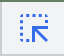
- Right clicking on specific text in the page and selecting 'inspect' will take you right to the html of that text


### <a href="https://www.crummy.com/software/BeautifulSoup/bs4/doc/">Step 6.</a>

In [43]:
soup = BeautifulSoup(response.text, 'html.parser')

In [44]:
soup

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="https://codeup.edu/xmlrpc.php" rel="pingback"/>
<script type="text/javascript">
		document.documentElement.className = 'js';
	</script>
<link crossorigin="" href="https://fonts.gstatic.com" rel="preconnect"/><script id="diviarea-loader">window.DiviPopupData=window.DiviAreaConfig={"zIndex":1000000,"animateSpeed":400,"triggerClassPrefix":"show-popup-","idAttrib":"data-popup","modalIndicatorClass":"is-modal","blockingIndicatorClass":"is-blocking","defaultShowCloseButton":true,"withCloseClass":"with-close","noCloseClass":"no-close","triggerCloseClass":"close","singletonClass":"single","darkModeClass":"dark","noShadowClass":"no-shadow","altCloseClass":"close-alt","popupSelector":".et_pb_section.popup","initializeOnEvent":"et_pb_after_init_modules","popupWrapperClass":"area-outer-wrap","fullHeightClass":"full-height","openPopupClass":"da-overlay-visible","ove

### Step 7.

In [45]:
#webpage title ELEMENT
soup.h1

<h1 class="entry-title">What are the Math and Stats Principles You Need for Data Science?</h1>

In [46]:
soup.h1.text

'What are the Math and Stats Principles You Need for Data Science?'

In [47]:
type(soup.h1)

bs4.element.Tag

In [48]:
#webpage title
soup.title

<title>What are the Math and Stats Principles You Need for Data Science? -</title>

In [49]:
# 1st paragraph element
soup.p

<p class="post-meta"><span class="published">Oct 21, 2020</span> | <a href="https://codeup.edu/category/data-science/" rel="category tag">Data Science</a></p>

In [50]:
#same thing as above
soup.find('p')

<p class="post-meta"><span class="published">Oct 21, 2020</span> | <a href="https://codeup.edu/category/data-science/" rel="category tag">Data Science</a></p>

In [51]:
#ALL paragraph elements
soup.find_all('p')

[<p class="post-meta"><span class="published">Oct 21, 2020</span> | <a href="https://codeup.edu/category/data-science/" rel="category tag">Data Science</a></p>,
 <p><span style="font-weight: 400;">Coming into our Data Science program, you will need to know some math and stats. However, many of our applicants actually learn in the </span><a href="https://codeup.edu/codeups-application-process/"><span style="font-weight: 400;">application process</span></a><span style="font-weight: 400;"> – you don’t need to be an expert before applying! Data science is a very accessible field to anyone dedicated to learning new skills, and we can work with any applicant to help them learn what they need to know. But what “skills” do we mean, exactly? Just what exactly are the data science math and stats principles you need to know?</span></p>,
 <p><strong>Algebra</strong></p>,
 <p><span style="font-weight: 400;">Do you know PEMDAS and can you solve for x? You will need to be or become comfortable with t

In [52]:
list_of_p_elements = soup.find_all('p')
#list_of_p_elements

In [53]:
for element in list_of_p_elements:
    print(element.a) #a for anchors will give us the hyperlinks

<a href="https://codeup.edu/category/data-science/" rel="category tag">Data Science</a>
<a href="https://codeup.edu/codeups-application-process/"><span style="font-weight: 400;">application process</span></a>
None
None
None
None
None
None
None
<a href="https://codeup.edu/apply-now"><span style="font-weight: 400;">apply!</span></a>
None
None
None
None
None
None
None
None
None
None
<a href="http://www.codeup.com/apply">apply</a>
None
None
None
<a href="tel:12108027289" title="call Codeup">(210) 802–7289</a>
<a href="/dallas">Dallas</a>
<a href="/privacy/">Privacy Policy</a>
None
None
None
None
None
None


### <a href = "https://developer.mozilla.org/en-US/docs/Web/CSS/CSS_Selectors">CSS Selectors</a>

In [54]:
# gives the results of `find_all`


In [55]:
soup.select("footer")

[<footer class="et-l et-l--footer">
 <div class="et_builder_inner_content et_pb_gutters3">
 <div class="et_pb_section et_pb_section_1_tb_footer et_pb_with_background et_pb_section_parallax et_section_regular">
 <div class="et_pb_row et_pb_row_0_tb_footer et_pb_gutters2">
 <div class="et_pb_column et_pb_column_1_2 et_pb_column_0_tb_footer et_pb_css_mix_blend_mode_passthrough">
 <div class="et_pb_module et_pb_text et_pb_text_0_tb_footer et_pb_text_align_center et_pb_bg_layout_light">
 <div class="et_pb_text_inner"><h3>Phone</h3>
 <p><a href="tel:12108027289" title="call Codeup">(210) 802–7289</a></p></div>
 </div><ul class="et_pb_module et_pb_social_media_follow et_pb_social_media_follow_0_tb_footer clearfix et_pb_text_align_center et_pb_bg_layout_light">
 <li class="et_pb_social_media_follow_network_0_tb_footer et_pb_social_icon et_pb_social_network_link et-social-facebook"><a class="icon et_pb_with_border" href="https://www.facebook.com/GoCodeup/" target="_blank" title="Follow on Faceb

In [56]:
# The id property is denoted with a #
soup.select("#dm-menu")

[<ul class="nav" id="dm-menu"><li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-home menu-item-16491"><a href="https://codeup.edu/">Home</a></li>
 <li class="menu-item menu-item-type-custom menu-item-object-custom menu-item-18125"><a href="https://codeup.edu/program/cloud-adminsitration/">Cloud Administration</a></li>
 <li class="menu-item menu-item-type-post_type menu-item-object-course menu-item-16497"><a href="https://codeup.edu/program/full-stack-web-development/">Full Stack Web Development</a></li>
 <li class="menu-item menu-item-type-post_type menu-item-object-course menu-item-16496"><a href="https://codeup.edu/program/data-science/">Data Science</a></li>
 <li class="menu-item menu-item-type-custom menu-item-object-custom menu-item-18628"><a href="http://codeup.edu/events/">Workshops</a></li>
 <li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-16502"><a href="https://codeup.edu/hire-tech-talent/">Hire Tech Talent</a></li>
 <l

In [57]:
# The class property is denoted with a . symbol before the class name
soup.select(".dm-search")

[<div class="dm-search">
 <div id="et_top_search_mob">
 <span id="et_search_icon"></span>
 <div class="dm-search-box" style="opacity: 0;">
 <form action="https://codeup.edu/" class="et-search-form" method="get" role="search">
 <input class="et-search-field" name="s" placeholder="Search …" title="Search for:" type="search" value=""/> </form>
 <span class="close"></span>
 </div>
 </div>
 </div>]

In [58]:
soup.select(".sub-menu")

[<ul class="sub-menu">
 <li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-16505"><a href="https://codeup.edu/frequently-asked-questions/">Common Questions</a></li>
 <li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-16498"><a href="https://codeup.edu/financial-aid/">Financial Aid</a></li>
 <li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-16501"><a href="https://codeup.edu/veterans/">Military</a></li>
 <li class="menu-item menu-item-type-custom menu-item-object-custom menu-item-16895"><a href="/my-story/">Student Reviews</a></li>
 <li class="menu-item menu-item-type-post_type menu-item-object-page current_page_parent menu-item-16504"><a href="https://codeup.edu/blog/">Blog</a></li>
 <li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-16685"><a href="https://codeup.edu/podcast/">Hire Tech Podcast</a></li>
 </ul>,
 <ul class="sub-menu">
 <li class="menu-item menu-item-type-post_ty

### Using sleep

In [59]:
import time

print("Hello")
time.sleep(5)
print("world!")

Hello


world!


### <a href = "https://www.nytimes.com/">NY Times Website</a>

In [60]:
nytresponse = requests.get('https://www.nytimes.com/')

In [61]:
#parse 1st link only


In [62]:
#parse 1st link only


In [63]:
#parse all links only


In [64]:
## You can `import random` to randomly select a different user-agent from a provided list:

import random

user_agents = [
  "Mozilla/5.0 (Windows NT 10.0; rv:91.0) Gecko/20100101 Firefox/91.0",
  "Mozilla/5.0 (Windows NT 10.0; rv:78.0) Gecko/20100101 Firefox/78.0",
  "Mozilla/5.0 (X11; Linux x86_64; rv:95.0) Gecko/20100101 Firefox/95.0"
  ]
random_user_agent = random.choice(user_agents)

headers = {'User-Agent': random_user_agent}

response = requests.get(url, headers=headers)

In [ ]:
# Or set the headers to show as Netscape Navigator on Windows 98, b/c I feel like creating an anomaly in the logs
headers = {"User-Agent": "Mozilla/4.5 (compatible; HTTrack 3.0x; Windows 98)"}